# Visualize tip data from model data frames

In [109]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import sys

%matplotlib inline

sns.set_style("ticks")

In [2]:
os.getcwd()

'/Users/jlhudd/projects/nextstrain/flu-forecasting/analyses/model-data-frames'

In [3]:
project_path = os.path.dirname(os.path.dirname(os.getcwd()))
augur_path = os.path.join(project_path, "dist", "augur")

In [4]:
augur_path

'/Users/jlhudd/projects/nextstrain/flu-forecasting/dist/augur'

In [5]:
sys.path.append(augur_path)

In [6]:
from base.fitness_model import fitness_model as FitnessModel, project_clade_frequencies_by_delta_from_time
from base.frequencies import KdeFrequencies
from base.io_util import json_to_tree, get_ordered_genes_from_metadata, reconstruct_sequences_from_tree_and_root

In [110]:
# Configure matplotlib theme.
fontsize = 14
matplotlib_params = {
    'axes.labelsize': fontsize,
    'font.size': fontsize,
    'legend.fontsize': 12,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': False,
    'figure.figsize': [6, 4],
    'savefig.dpi': 300,
    'figure.dpi': 120,
    'text.usetex': False
}

plt.rcParams.update(matplotlib_params)

# Turn off spines for all plots.
plt.rc("axes.spines", top=False, right=False)

In [8]:
delta_t = 1.0

In [9]:
sample_number = 1

## Load data

  - tree
  - frequencies
  - metadata
  - root sequences
  - clade data
  - tips data
  - model

In [10]:
# Load tree.
with open("flu_h3n2_ha_2006-2018y_24v_%s_tree.json" % sample_number, "r") as fh:
    json_tree = json.load(fh)
    
tree = json_to_tree(json_tree)

In [11]:
# Load frequencies.
with open("flu_h3n2_ha_2006-2018y_24v_%s.json" % sample_number, "r") as fh:
    frequencies_json = json.load(fh)

kde_frequencies = KdeFrequencies.from_json(frequencies_json)

In [12]:
# Read clade inputs data frame.
clades_df = pd.read_table("clades_%s.tsv" % sample_number)

In [13]:
clades_df.head()

clade_name  final_frequency  initial_frequency  timepoint  total_tips
0  NODE_0001345         0.034937           0.112821    2007.25          17
1  NODE_0001342         0.054284           0.120470    2007.25          18
2  NODE_0002924         0.058776           0.173859    2007.25          21
3  NODE_0002921         0.059065           0.191081    2007.25          35
4  NODE_0001319         0.099058           0.194526    2007.25          38

In [14]:
# Read model data frame.
df = pd.read_table("tips_%s.tsv" % sample_number)

In [15]:
df.head()

censored_frequency    clade_name                  name     num_date  \
0            0.002488  NODE_0001345  A/HongKong/3052/2006  2006.766598   
1            0.004295  NODE_0001345  A/HongKong/3068/2006  2006.843258   
2            0.000962  NODE_0001345    A/Incheon/682/2006  2006.887064   
3            0.001557  NODE_0001345      A/Canada/32/2006  2006.898015   
4            0.005989  NODE_0001345     A/Taiwan/788/2006  2006.898015   

   observed_frequency  predictor:ep_x  predictor:lbi  predictor:ne_star  \
0            0.001311             0.0       0.195291          -0.710284   
1            0.002263             0.0      -0.211030           1.720853   
2            0.000948             0.0      -0.556746          -0.710284   
3            0.000703             0.0      -0.532689           0.505284   
4            0.003156             0.0      -0.476167          -0.710284   

   timepoint  
0    2007.25  
1    2007.25  
2    2007.25  
3    2007.25  
4    2007.25

In [16]:
df.shape

(95582, 9)

In [17]:
df["name"].str.contains("-egg").sum()

0

In [18]:
# Load HA metadata.
with open("flu_h3n2_ha_2006-2018y_24v_%s_meta.json" % sample_number, "r") as fh:
    ha_metadata = json.load(fh)

# Get HA genes in order.
ha_ordered_genes = get_ordered_genes_from_metadata(ha_metadata)

# Load HA root sequences.
with open("flu_h3n2_ha_2006-2018y_24v_%s_seq.json" % sample_number, "r") as fh:
    ha_root_sequences = json.load(fh)

# Reconstruct ordered translations from the tree, root sequences, and gene order.
tree = reconstruct_sequences_from_tree_and_root(tree, ha_root_sequences, ha_ordered_genes)

In [19]:
tree.root.translations

OrderedDict([(u'SigPep', u'MKTIIALSYILCLVFA'),
             (u'nuc',
              u'ATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCGCTCAAAAACTTCCCGGAAATGACAACAGCACGGCAACGCTGTGCCTTGGGCACCATGCAGTACCAAACGGAACGATAGTGAAAACAATCACGAATGACCAAATTGAAGTTACTAATGCTACTGAGCTGGTTCAGAGTTCCTCAACAGGTGGAATATGCGACAGTCCTCATCAGATCCTTGATGGAGAAAACTGCACACTAATAGATGCTCTATTGGGAGACCCTCAGTGTGATGGCTTCCAAAATAAGAAATGGGACCTTTTTGTTGAACGCAGCAAAGCCTACAGCAACTGTTACCCTTATGATGTGCCGGATTATGCCTCCCTTAGGTCACTAGTTGCCTCATCCGGCACACTGGAGTTTAACAATGAAAGCTTCAATTGGACTGGAGTCACTCAAAATGGAACAAGCTCTGCTTGCAAAAGGAGATCTAATAACAGTTTCTTTAGTAGATTGAATTGGTTGACCCACTTAAAATTCAAATACCCAGCATTGAACGTGACTATGCCAAACAATGAAAAATTTGACAAATTGTACATTTGGGGGGTTCACCACCCGGGTACGGACAATGACCAAATCTTCCTGTATGCTCAAGCATCAGGAAGAATCACAGTCTCTACCAAAAGAAGCCAACAAACTGTAATCCCGAATATCGGATCTAGACCCAGAGTAAGGAATATCCCCAGCAGAATAAGCATCTATTGGACAATAGTAAAACCGGGAGACATACTTTTGATTAACAGCACAGGGAATCTAATTGCTCCTAGGGGTTACTTCAAAATACGAAGTGGGAAAAGCTCAATAATGAGATCAGATGCACCCATTGGCAAATGCAATTCTGAATGCATCACTCCAAATGGAAGCATTCCC

In [44]:
# Load model.
with open("model_%s.json" % sample_number) as fh:
    json_model = json.load(fh)

predictors = {record["predictor"]: [round(record["param"], 2), round(record["global_sd"], 2)]
              for record in json_model["params"]}
predictors_key = "-".join(sorted([record["predictor"] for record in json_model["params"]]))
predictor_kwargs = json_model["predictor_kwargs"]

model = FitnessModel(
    tree,
    kde_frequencies,
    predictors,
    epitope_masks_fname="%s/builds/flu/metadata/ha_masks.tsv" % augur_path,
    epitope_mask_version="wolf",
    tolerance_mask_version="HA1",
    min_freq=0.1,
    predictor_kwargs=predictor_kwargs,
    verbose=1
)
model.predict()

setup wolf epitope mask and HA1 tolerance mask
Calculating censored frequencies for 2007.25
Calculating censored frequencies for 2007.76
Calculating censored frequencies for 2008.26
Calculating censored frequencies for 2008.77
Calculating censored frequencies for 2009.27
Calculating censored frequencies for 2009.77
Calculating censored frequencies for 2010.28
Calculating censored frequencies for 2010.78
Calculating censored frequencies for 2011.29
Calculating censored frequencies for 2011.79
Calculating censored frequencies for 2012.29
Calculating censored frequencies for 2012.8
Calculating censored frequencies for 2013.3
Calculating censored frequencies for 2013.81
Calculating censored frequencies for 2014.31
Calculating censored frequencies for 2014.81
Calculating censored frequencies for 2015.32
Calculating censored frequencies for 2015.82
Calculating censored frequencies for 2016.33
Calculating censored frequencies for 2016.83
Calculating censored frequencies for 2017.33
Calculatin

('calculating predictors for time', 2007.25)
calculating cross-immunity at 2007.25 between 140 current nodes and 1 past nodes
('calculating predictors for time', 2007.76)
calculating cross-immunity at 2007.76 between 128 current nodes and 146 past nodes
('calculating predictors for time', 2008.26)
calculating cross-immunity at 2008.26 between 135 current nodes and 274 past nodes
('calculating predictors for time', 2008.77)
calculating cross-immunity at 2008.77 between 133 current nodes and 412 past nodes
('calculating predictors for time', 2009.27)
calculating cross-immunity at 2009.27 between 137 current nodes and 545 past nodes
('calculating predictors for time', 2009.77)
calculating cross-immunity at 2009.77 between 107 current nodes and 682 past nodes
('calculating predictors for time', 2010.28)
calculating cross-immunity at 2010.28 between 110 current nodes and 790 past nodes
('calculating predictors for time', 2010.78)
calculating cross-immunity at 2010.78 between 121 current nod

In [45]:
predictors

{u'ep_x': [0.22, 0.34], u'lbi': [0.57, 0.15], u'ne_star': [0.44, 0.82]}

In [46]:
predictor_kwargs

{u'lam_avi': 2.0,
 u'lam_drop': 2.0,
 u'lam_pot': 0.3,
 u'preferences_file': u'/fh/fast/bedford_t/users/jhuddles/flu-forecasting/data/dms-h3n2-preferences-rescaled.csv',
 u'step_size': 0.5,
 u'tau': 0.5,
 u'time_window': 0.1}

In [47]:
model.validate_prediction()

('Abs clade error:', 12.843945513224897)
("Pearson's R, null:", (0.87301866776729509, 6.6868341033645895e-244))
("Pearson's R, raw:", (0.93586730593367617, 0.0))
("Pearson's R, rel:", (0.532112861901751, 5.1237671656119142e-58))
Correct at predicting growth: 0.87786259542 (345 / 393.0)
Correct at predicting decline: 0.661458333333 (254 / 384.0)
('Correct classification:', 0.77091377091377089)
Matthew's correlation coefficient: 0.553170338532
Params:
[(u'lbi', 0.56999999999999995), (u'ep_x', 0.22), (u'ne_star', 0.44)]


In [70]:
model_df = model.pred_vs_true_df.copy()

In [71]:
model_df["observed_growth_rate"] = model_df["observed_freq"] / model_df["initial_freq"]
model_df["predicted_growth_rate"] = model_df["predicted_freq"] / model_df["initial_freq"]

In [72]:
model_df.head()

timepoint  projected_timepoint         clade  clade_size  initial_freq  \
0    2007.25              2008.25  NODE_0001345          22      0.112821   
1    2007.25              2008.25  NODE_0001342          25      0.120470   
2    2007.25              2008.25  NODE_0002924          29      0.173859   
3    2007.25              2008.25  NODE_0002921          43      0.191081   
4    2007.25              2008.25  NODE_0001319          48      0.194526   

   observed_freq  predicted_freq  observed_growth_rate  predicted_growth_rate  
0       0.034937        0.046297              0.309667               0.410359  
1       0.054284        0.048650              0.450604               0.403837  
2       0.058776        0.062374              0.338068               0.358765  
3       0.059065        0.067422              0.309112               0.352842  
4       0.099058        0.075910              0.509231               0.390231

## Compare censored and uncensored frequencies

In [73]:
import statsmodels.api as sm

In [74]:
y = df["censored_frequency"]
x = df["observed_frequency"]
x = sm.add_constant(x)
ols = sm.OLS(y, x)
results = ols.fit()

In [75]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     censored_frequency   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                 3.271e+05
Date:                Wed, 31 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:47:42   Log-Likelihood:             4.0867e+05
No. Observations:               95582   AIC:                        -8.173e+05
Df Residuals:                   95580   BIC:                        -8.173e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0002    1.2e-05     20.569      0.000       0.000       0.000
observed_frequency     1.8441      0.003    571.946      0.000       1.838       1.850
==============================================================================
Omnibus:                   191913.654   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1117678207.307
Skew:                          16.266   Prob(JB):                         0.00
Kurtosis:                     531.756   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
results.params["const"]

0.00024756031265854193

In [77]:
results.params["observed_frequency"]

1.8441404262869532

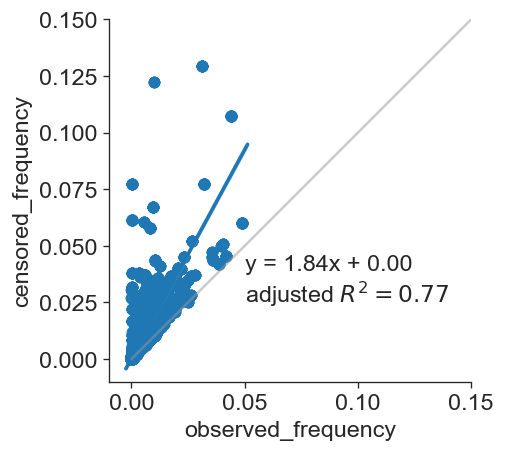

In [78]:
x = np.linspace(0, 0.15, 100)
y = x
ax = sns.regplot("observed_frequency", "censored_frequency", df)
ax.plot(x, y, color="#999999", alpha=0.5)
ax.set_aspect("equal")
ax.set_xlim(-0.01, 0.15)
ax.set_ylim(-0.01, 0.15)
ax.text(0.05, 0.025, "y = %.2fx + %.2f\nadjusted $R^{2} = %.2f$" % (
    results.params["observed_frequency"],
    results.params["const"],
    results.rsquared_adj
))

In [79]:
# Find the extreme data point.
df[(df["censored_frequency"] > 0.125) & (df["observed_frequency"] < 0.05)]

censored_frequency           clade_name                 name  \
294             0.129255  A/India/AF1082/2007  A/India/AF1082/2007   
295             0.129255         NODE_0003042  A/India/AF1082/2007   
297             0.129255         NODE_0004175  A/India/AF1082/2007   
302             0.129255         NODE_0001030  A/India/AF1082/2007   
308             0.129255         NODE_0001028  A/India/AF1082/2007   
317             0.129255         NODE_0001002  A/India/AF1082/2007   
326             0.129255         NODE_0001001  A/India/AF1082/2007   
337             0.129255         NODE_0001108  A/India/AF1082/2007   
355             0.129255         NODE_0001221  A/India/AF1082/2007   
387             0.129255         NODE_0001300  A/India/AF1082/2007   
429             0.129255         NODE_0001302  A/India/AF1082/2007   
482             0.129255         NODE_0001303  A/India/AF1082/2007   
536             0.129255         NODE_0002947  A/India/AF1082/2007   
629             0.129255         NODE_0001318  A/India/AF1082/2007   
2166            0.200580    A/India/7881/2008    A/India/7881/2008   
2168            0.200580         NODE_0001277    A/India/7881/2008   
2171            0.200580         NODE_0001276    A/India/7881/2008   
2177            0.200580         NODE_0001273    A/India/7881/2008   
2184            0.200580         NODE_0001272    A/India/7881/2008   
2194            0.200580         NODE_0002964    A/India/7881/2008   
2217            0.200580         NODE_0002963    A/India/7881/2008   
2257            0.200580         NODE_0002959    A/India/7881/2008   
2300            0.200580         NODE_0004173    A/India/7881/2008   
3340            0.200580         NODE_0001297    A/India/7881/2008   

         num_date  observed_frequency  predictor:ep_x  predictor:lbi  \
294   2007.114990            0.031271        0.000000       1.783801   
295   2007.114990            0.031271        0.000000       1.783801   
297   2007.114990            0.031271        0.000000       1.783801   
302   2007.114990            0.031271        0.000000       1.783801   
308   2007.114990            0.031271        0.000000       1.783801   
317   2007.114990            0.031271        0.000000       1.783801   
326   2007.114990            0.031271        0.000000       1.783801   
337   2007.114990            0.031271        0.000000       1.783801   
355   2007.114990            0.031271        0.000000       1.783801   
387   2007.114990            0.031271        0.000000       1.783801   
429   2007.114990            0.031271        0.000000       1.783801   
482   2007.114990            0.031271        0.000000       1.783801   
536   2007.114990            0.031271        0.000000       1.783801   
629   2007.114990            0.031271        0.000000       1.783801   
2166  2008.249144            0.030498       -0.284379      -0.328733   
2168  2008.249144            0.030498       -0.284379      -0.328733   
2171  2008.249144            0.030498       -0.284379      -0.328733   
2177  2008.249144            0.030498       -0.284379      -0.328733   
2184  2008.249144            0.030498       -0.284379      -0.328733   
2194  2008.249144            0.030498       -0.284379      -0.328733   
2217  2008.249144            0.030498       -0.284379      -0.328733   
2257  2008.249144            0.030498       -0.284379      -0.328733   
2300  2008.249144            0.030498       -0.284379      -0.328733   
3340  2008.249144            0.030498       -0.284379      -0.328733   

      predictor:ne_star  timepoint  
294           -0.710284    2007.25  
295           -0.710284    2007.25  
297           -0.710284    2007.25  
302           -0.710284    2007.25  
308           -0.710284    2007.25  
317           -0.710284    2007.25  
326           -0.710284    2007.25  
337           -0.710284    2007.25  
355           -0.710284    2007.25  
387           -0.710284    2007.25  
429           -0.710284    2007.25  
482       

## Compare predictor values to each other

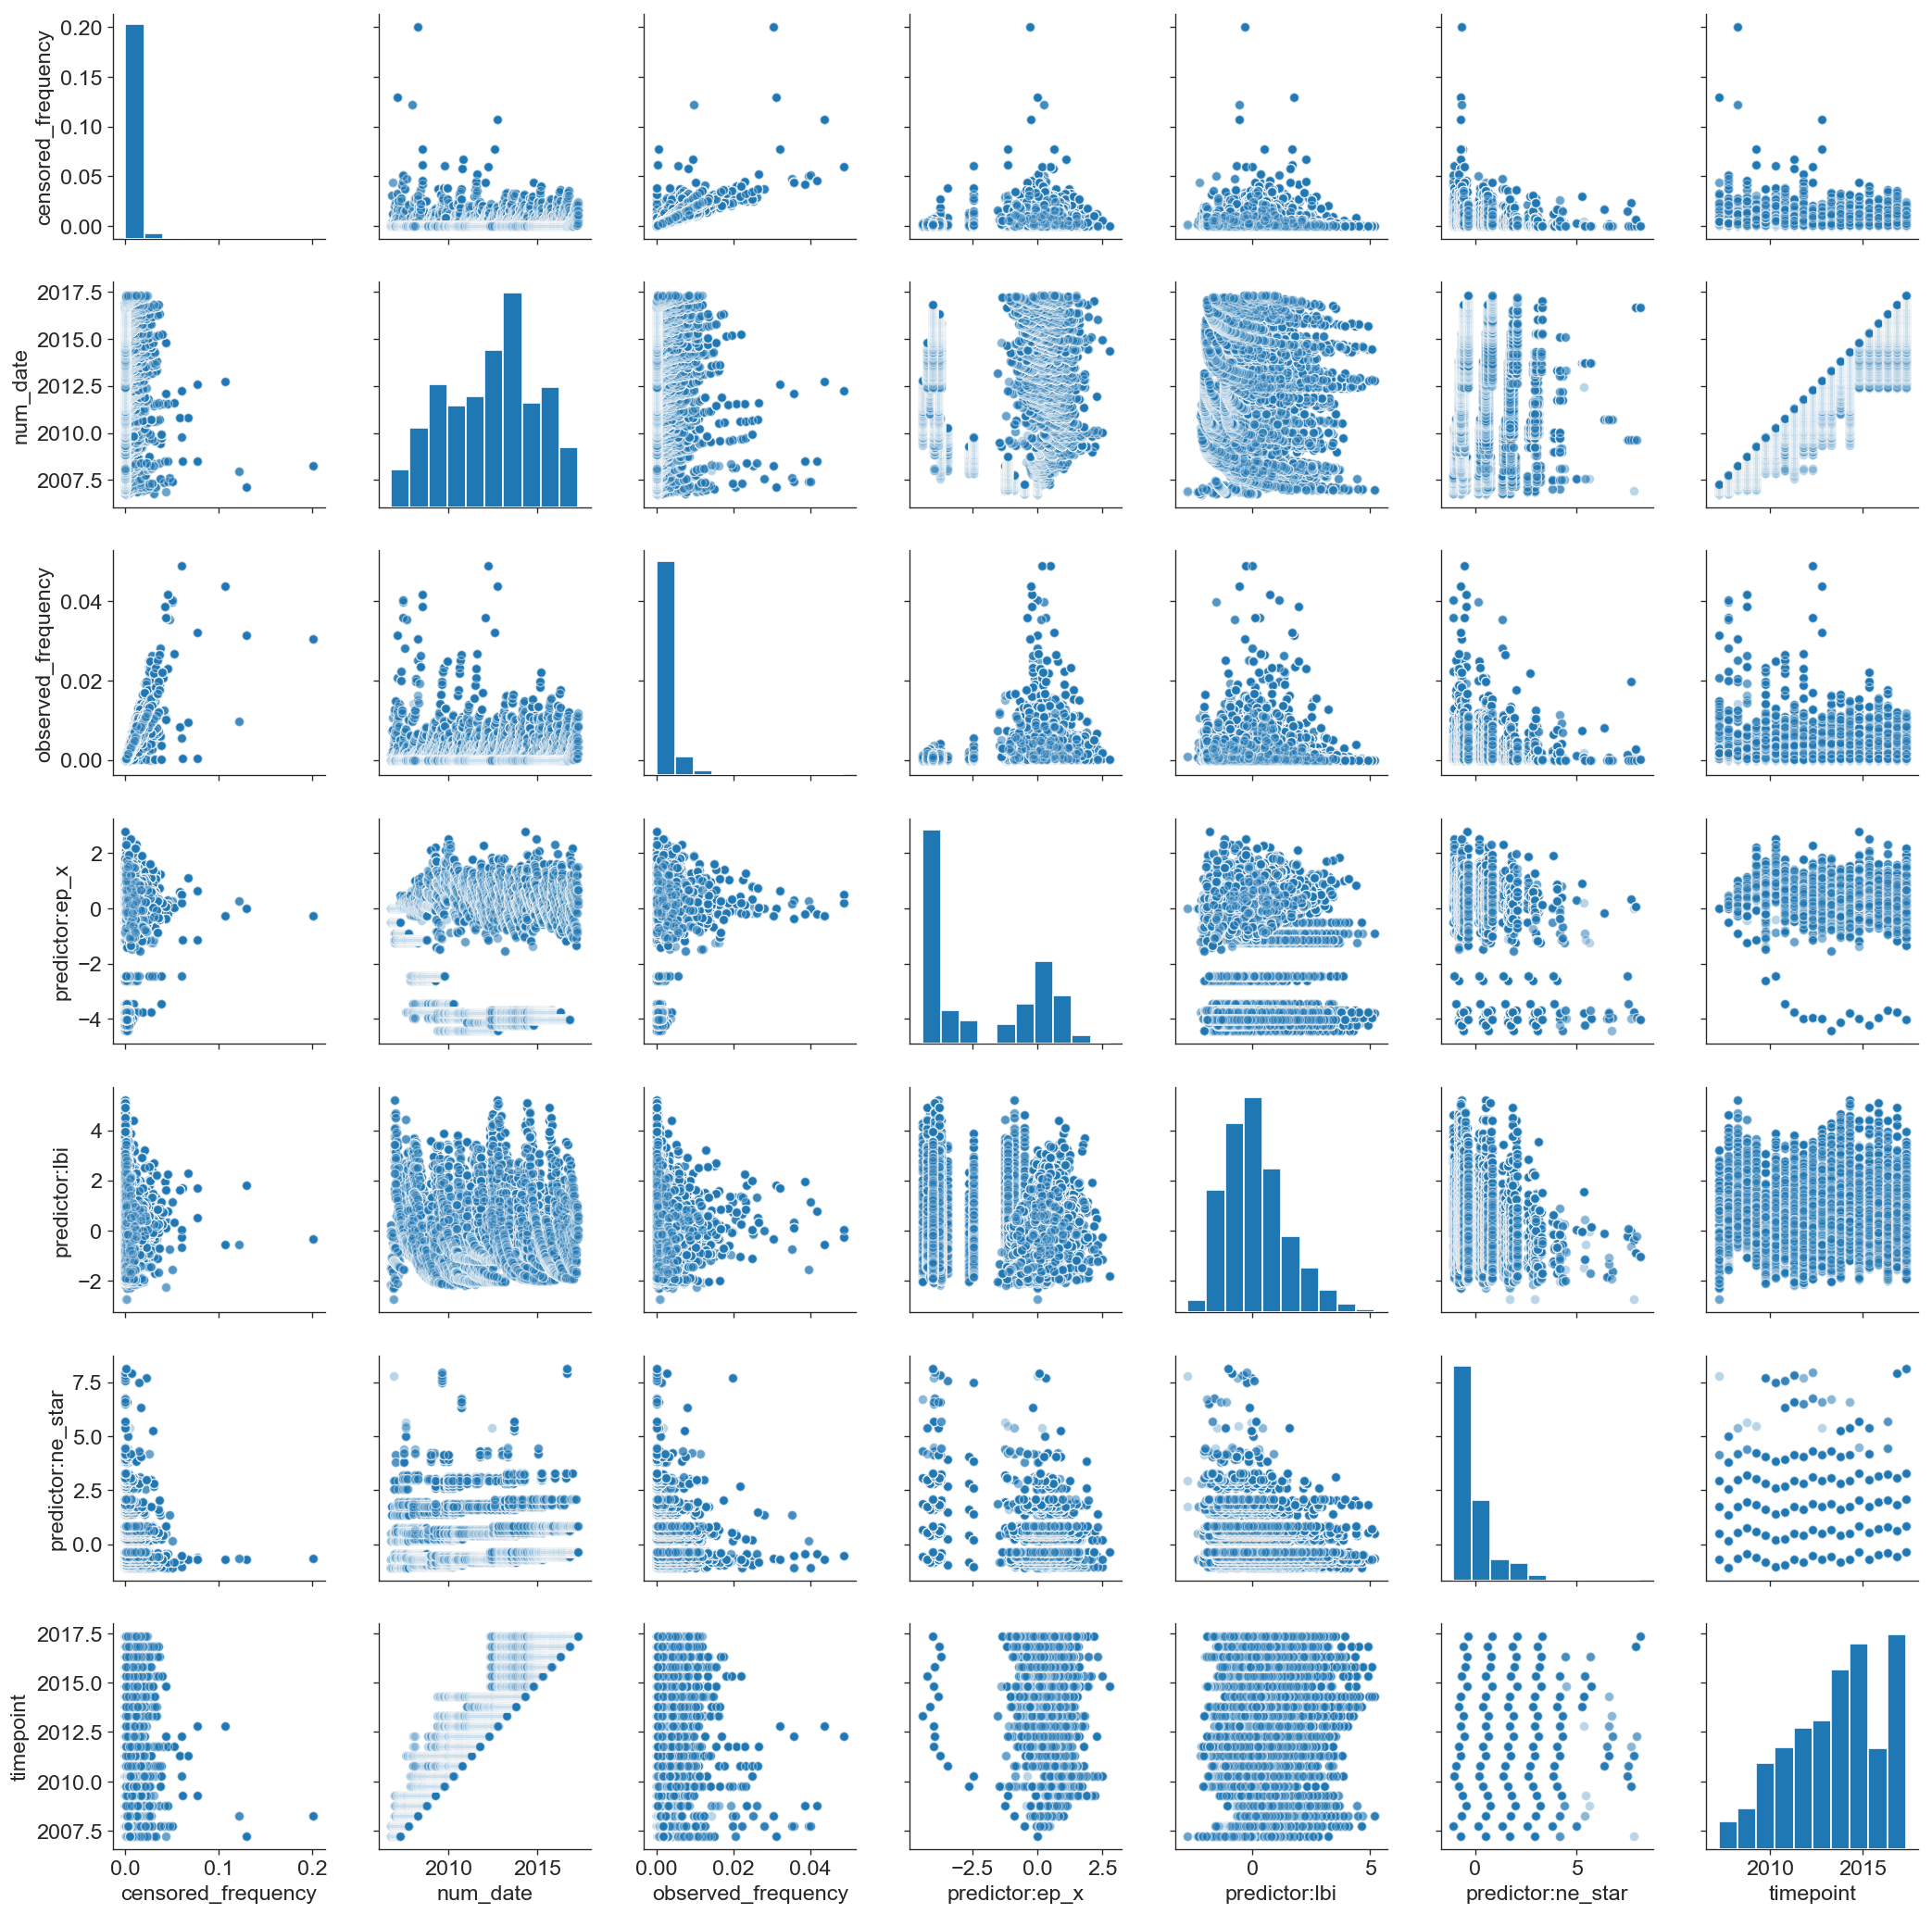

In [31]:
sns.pairplot(
    df,
    plot_kws={"alpha": 0.3}
)

In [32]:
#sns.distplot(df["predictor:ep_x"], kde=False)

In [33]:
#g = sns.FacetGrid(df[df["observed_frequency"] > 0], col="timepoint", col_wrap=4, sharey=False)
#g.map(sns.distplot, "predictor:ep_x", kde=False, bins=10)

In [80]:
df.groupby("timepoint")["censored_frequency"].sum()

timepoint
2007.25     6.309418
2007.76     6.281405
2008.26     6.125500
2008.77     7.701685
2009.27    12.075967
2009.77    15.408118
2010.28    12.505340
2010.78    10.601263
2011.29    14.841346
2011.79    10.848385
2012.29    16.553504
2012.80    16.543721
2013.30    27.773191
2013.81    28.790378
2014.31    29.513839
2014.81    12.908368
2015.32    12.870528
2015.82    14.062434
2016.33    14.960570
2016.83    16.160024
2017.33    11.978266
Name: censored_frequency, dtype: float64

## Plot the sampling density of tips by time

In [81]:
tips = df.loc[:, ["name", "num_date"]].drop_duplicates()

In [82]:
tips.head()

name     num_date
0  A/HongKong/3052/2006  2006.766598
1  A/HongKong/3068/2006  2006.843258
2    A/Incheon/682/2006  2006.887064
3      A/Canada/32/2006  2006.898015
4     A/Taiwan/788/2006  2006.898015

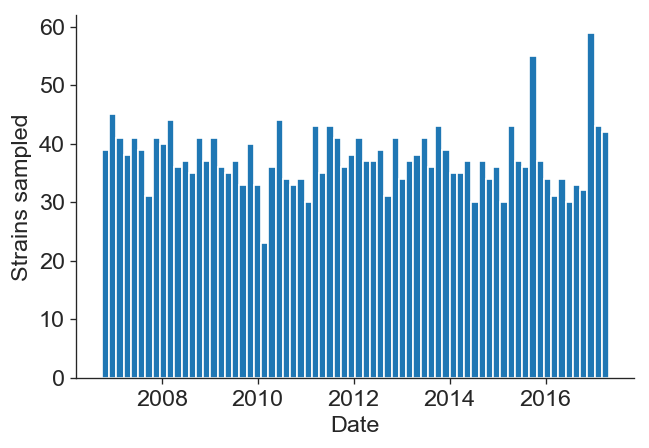

In [83]:
plt.hist(tips["num_date"], bins=70)
plt.xlabel("Date")
plt.ylabel("Strains sampled")

## Plot clade dynamics

In [84]:
clades_df["fold_change"] = clades_df["final_frequency"] / clades_df["initial_frequency"]
clades_df["delta_frequency"] = clades_df["final_frequency"] - clades_df["initial_frequency"]

(-0.01, 1)

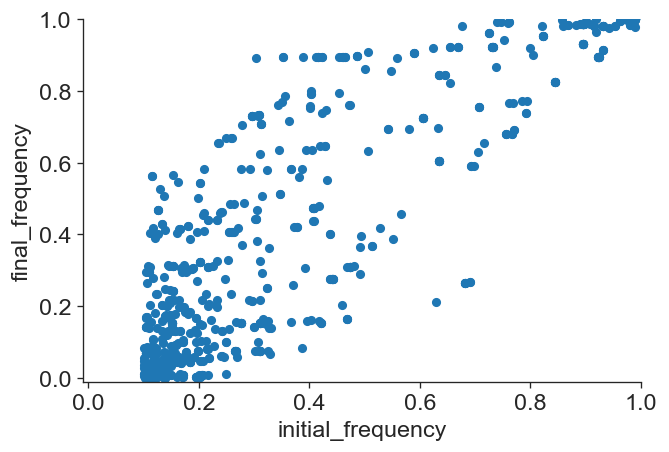

In [85]:
ax = clades_df.plot(
    x="initial_frequency",
    y="final_frequency",
    kind="scatter"
)
ax.set_xlim(-0.01, 1)
ax.set_ylim(-0.01, 1)

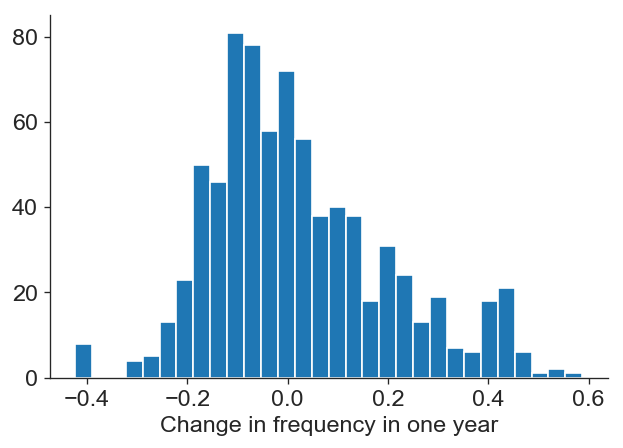

In [86]:
plt.hist(clades_df["final_frequency"] - clades_df["initial_frequency"], bins=30)
plt.xlabel("Change in frequency in one year")

## Model accuracy

Plot observed frequency fold change by predictors.

In [104]:
correlation = pearsonr(model_df["observed_growth_rate"], model_df["predicted_growth_rate"])[0]

(0, 5)

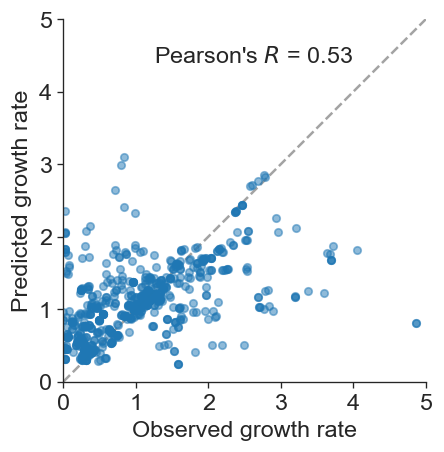

In [130]:
min_rate = 0
max_rate = 5
x = y = np.linspace(min_rate, max_rate, 100)
ax = model_df.plot(
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    figsize=(4, 4)
)
ax.plot(x, y, "--", color="#999999", alpha=0.9, zorder=-10)
ax.text(
    0.25,
    0.9,
    "Pearson's $R$ = %.2f" % correlation,
    transform=ax.transAxes,
    horizontalalignment="left",
    verticalalignment="center"
)

ax.set_xlabel("Observed growth rate")
ax.set_ylabel("Predicted growth rate")
ax.set_aspect("equal")
ax.set_xlim(min_rate, max_rate)
ax.set_ylim(min_rate, max_rate)

(0, 5)

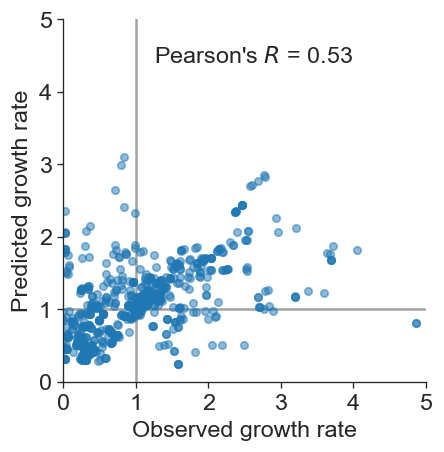

In [129]:
min_rate = 0
max_rate = 5
ax = model_df.plot(
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    figsize=(4, 4)
)
ax.axhline(1, color="#999999", alpha=0.9, zorder=-10)
ax.axvline(1, color="#999999", alpha=0.9, zorder=-10)
ax.text(
    0.25,
    0.9,
    "Pearson's $R$ = %.2f" % correlation,
    transform=ax.transAxes,
    horizontalalignment="left",
    verticalalignment="center"
)

ax.set_xlabel("Observed growth rate")
ax.set_ylabel("Predicted growth rate")
ax.set_aspect("equal")
ax.set_xlim(min_rate, max_rate)
ax.set_ylim(min_rate, max_rate)

In [124]:
model_df.head()

timepoint  projected_timepoint         clade  clade_size  initial_freq  \
0    2007.25              2008.25  NODE_0001345          22      0.112821   
1    2007.25              2008.25  NODE_0001342          25      0.120470   
2    2007.25              2008.25  NODE_0002924          29      0.173859   
3    2007.25              2008.25  NODE_0002921          43      0.191081   
4    2007.25              2008.25  NODE_0001319          48      0.194526   

   observed_freq  predicted_freq  observed_growth_rate  predicted_growth_rate  
0       0.034937        0.046297              0.309667               0.410359  
1       0.054284        0.048650              0.450604               0.403837  
2       0.058776        0.062374              0.338068               0.358765  
3       0.059065        0.067422              0.309112               0.352842  
4       0.099058        0.075910              0.509231               0.390231

In [125]:
model_df[model_df["clade"] == "NODE_0001319"]

timepoint  projected_timepoint         clade  clade_size  initial_freq  \
4    2007.25              2008.25  NODE_0001319          48      0.194526   

   observed_freq  predicted_freq  observed_growth_rate  predicted_growth_rate  
4       0.099058         0.07591              0.509231               0.390231

## Project clade frequencies and plot per timepoint

In [95]:
pivots = kde_frequencies.pivots

In [87]:
time = model.timepoints[-1]
delta = 1.0

In [88]:
projected_frequencies = project_clade_frequencies_by_delta_from_time(tree, model, time, delta)

In [89]:
projected_frequencies["params"]

{'max_date': 2018.3299999999999}

In [113]:
projected_pivots = np.array(projected_frequencies["data"]["pivots"])

In [114]:
projected_pivots

array([ 2018.33      ,  2018.42090909,  2018.51181818,  2018.60272727,
        2018.69363636,  2018.78454545,  2018.87545455,  2018.96636364,
        2019.05727273,  2019.14818182,  2019.23909091,  2019.33      ])

In [93]:
projected_frequencies["data"]["frequencies"].keys()[:10]

[u'NODE_0003895',
 u'NODE_0003683',
 u'NODE_0003595',
 u'A/Oujda/144H/2011',
 u'A/Tanzania/1592/2016',
 u'NODE_0004114',
 u'NODE_0004172',
 u'NODE_0003592',
 u'NODE_0003739',
 u'NODE_0002360']

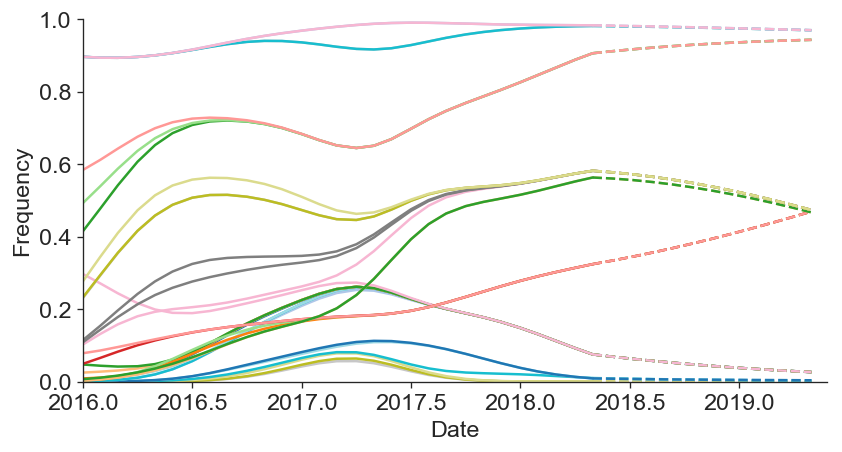

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for clade_name in clade_names:
    ax.plot(
        kde_frequencies.pivots,
        kde_frequencies.frequencies[clade_name],
        "-",
        c=color_by_clade_name[clade_name],
        label=clade_name
    )
    ax.plot(
        projected_frequencies["data"]["pivots"],
        projected_frequencies["data"]["frequencies"][clade_name],
        "--",
        c=color_by_clade_name[clade_name]
    )

ax.set_xlim(2016.0, 2019.4)
ax.set_ylim(0, 1)
ax.set_xlabel("Date")
ax.set_ylabel("Frequency")

#ax.legend()
sns.despine()

In [96]:
cmap = plt.get_cmap("tab20")

In [97]:
pivots

array([ 2006.75,  2006.83,  2006.92,  2007.  ,  2007.08,  2007.17,
        2007.25,  2007.33,  2007.42,  2007.5 ,  2007.58,  2007.67,
        2007.75,  2007.83,  2007.92,  2008.  ,  2008.08,  2008.17,
        2008.25,  2008.33,  2008.42,  2008.5 ,  2008.58,  2008.67,
        2008.75,  2008.83,  2008.92,  2009.  ,  2009.08,  2009.17,
        2009.25,  2009.33,  2009.42,  2009.5 ,  2009.58,  2009.67,
        2009.75,  2009.83,  2009.92,  2010.  ,  2010.08,  2010.17,
        2010.25,  2010.33,  2010.42,  2010.5 ,  2010.58,  2010.67,
        2010.75,  2010.83,  2010.92,  2011.  ,  2011.08,  2011.16,
        2011.25,  2011.33,  2011.41,  2011.5 ,  2011.58,  2011.66,
        2011.75,  2011.83,  2011.91,  2012.  ,  2012.08,  2012.16,
        2012.25,  2012.33,  2012.41,  2012.5 ,  2012.58,  2012.66,
        2012.75,  2012.83,  2012.91,  2013.  ,  2013.08,  2013.16,
        2013.25,  2013.33,  2013.41,  2013.5 ,  2013.58,  2013.66,
        2013.75,  2013.83,  2013.91,  2014.  ,  2014.08,  2014

In [98]:
clade_names = clades_df["clade_name"].unique()
color_by_clade_name = {}
for i, clade_name in enumerate(clade_names):
    color_by_clade_name[clade_name] = cmap(i % 20)

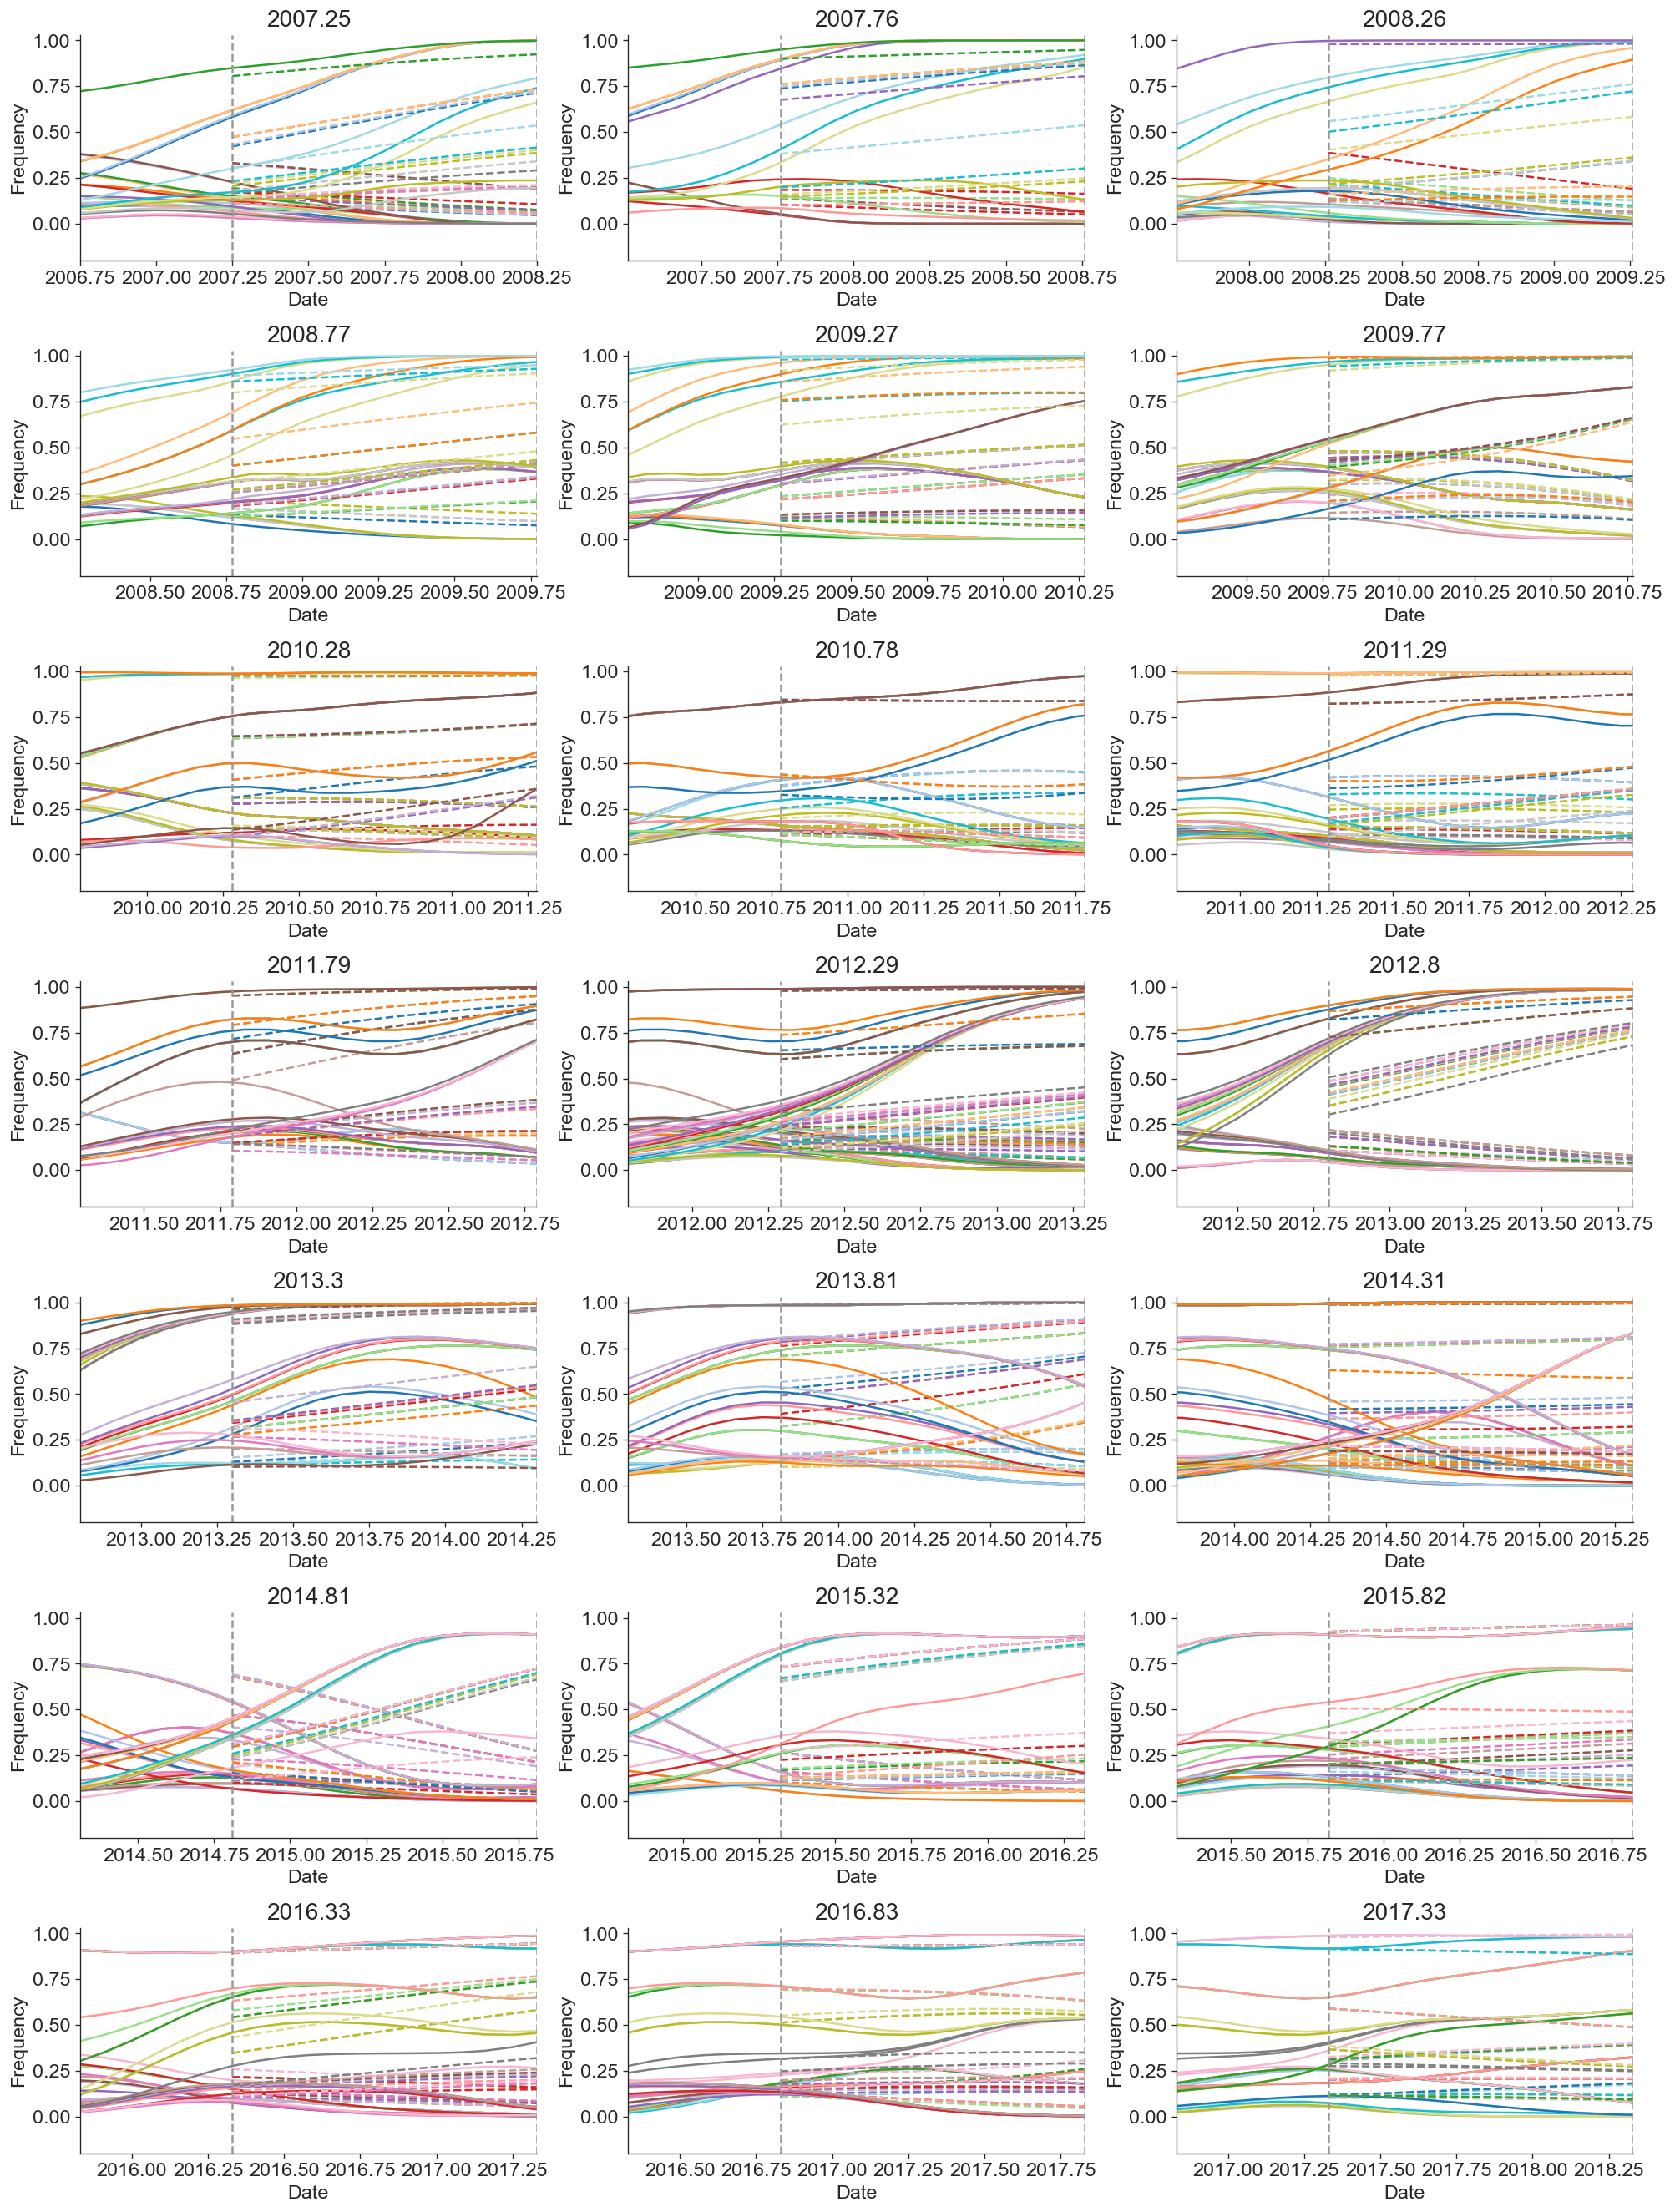

In [131]:
timepoints = sorted(clades_df["timepoint"].unique())
n_cols = 3
n_rows = int(np.ceil(len(timepoints) / float(n_cols)))

#n_cols = 1
#n_rows = 1
fig, axes = plt.subplots(n_rows, n_cols, squeeze=False, figsize=(20, 4 * n_rows), gridspec_kw={"hspace": 0.4})

for i, ax in enumerate(axes.flatten()):
    if i < len(timepoints):
        timepoint = timepoints[i]
        start_pivot_index = pivots.searchsorted(timepoint - 1)
        end_pivot_index = pivots.searchsorted(timepoint + 2)
        
        projected_frequencies_for_timepoint = project_clade_frequencies_by_delta_from_time(
            tree,
            model,
            timepoint,
            delta=1.0
        )
        
        clade_names = clades_df[clades_df["timepoint"] == timepoint]["clade_name"].unique()
        clade_counter = 0
        for clade_name in clade_names:
            # Plot clade's overall trajectory.
            ax.plot(pivots[start_pivot_index:end_pivot_index],
                    #frequencies["data"]["frequencies"][clade_name],
                    kde_frequencies.frequencies[clade_name][start_pivot_index:end_pivot_index],
                    "-",
                    c=color_by_clade_name[clade_name])
            
            ax.plot(
                np.array(projected_frequencies_for_timepoint["data"]["pivots"]),
                projected_frequencies_for_timepoint["data"]["frequencies"][clade_name],
                "--",
                c=color_by_clade_name[clade_name]
            )
            # Identify tips in this clade and plot them as a rug.
            #clade_tip_dates = df[df["clade_name"] == clade_name]["num_date"].values
            #ax.scatter(clade_tip_dates, [-0.05 - (clade_counter * 0.02)] * len(clade_tip_dates), marker="|", c=color_by_clade_name[clade_name])
            
            clade_counter += 1

        ax.set_title(timepoint)
        ax.set_xlabel("Date")
        ax.set_ylabel("Frequency")
        ax.set_xlim(timepoint - 0.5, timepoint + delta_t)
        ax.set_ylim(-0.2, 1.03)
        ax.axvline(x=timepoint, linestyle="--", color="#999999")
        ax.axvline(x=timepoint + delta_t, linestyle="--", color="#999999")